 **Importing Libraries**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Groceries_dataset.csv to Groceries_dataset.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Reading the **Dataset**

In [4]:
data = pd.read_csv('Groceries_dataset.csv')
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Data Exploration


In [5]:
x = data['itemDescription'].value_counts().sort_values(ascending=False)[:10]
print(x)

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64


<Axes: xlabel='itemDescription'>

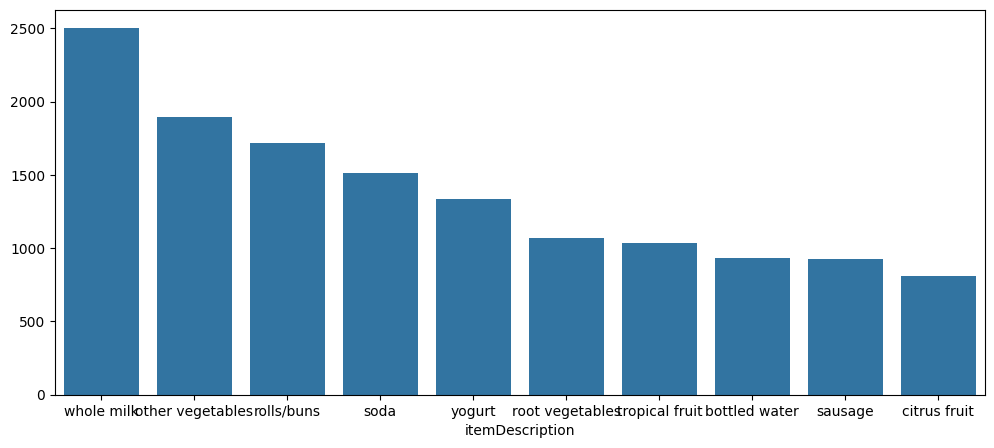

In [6]:
plt.figure(figsize=(12, 5))
sns.barplot(x=x.index, y=x.values)

In [7]:
!pip install mlxtend



In [8]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [9]:
data['Quantity'] = 1

In [9]:
data

,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,1
38761,2022,23-02-2014,candy,1
38762,1097,16-04-2014,cake bar,1
38763,1510,03-12-2014,fruit/vegetable juice,1


In [10]:
transactions =  data.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')


In [11]:
transactions = transactions.fillna(0)

In [12]:
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
def encode(x):
    if x <=0:
        return 0
    elif x>=0:
        return 1
basket = transactions.applymap(encode)
basket

<ipython-input-13-d411024fc275>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = transactions.applymap(encode)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Convert the basket DataFrame to boolean type
basket_bool = basket.astype(bool)

frequent_itemset = apriori(basket_bool, min_support=0.06, use_colnames=True)
rules = association_rules(frequent_itemset, metric='lift', min_threshold=1)

In [17]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
1,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,1.0,0.009360,1.023754,0.269364,0.124875,0.023203,0.338229
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
3,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,1.0,0.008692,1.028212,0.203563,0.146703,0.027438,0.306610
4,(bottled beer),(rolls/buns),0.158799,0.349666,0.063109,0.397415,1.136555,1.0,0.007582,1.079240,0.142829,0.141705,0.073422,0.288950


In [18]:
rules[(rules['confidence']>0.4) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
6,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,1.0,0.012669,1.172672,0.176297,0.160714,0.147247,0.362207
9,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,1.0,0.013414,1.111969,0.181695,0.189147,0.100694,0.344347
15,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,1.0,0.014452,1.142615,0.163569,0.200825,0.124815,0.385526
19,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,1.0,0.007481,1.113034,0.124087,0.133072,0.101554,0.332752
21,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,1.0,0.008239,1.136661,0.142501,0.127660,0.120231,0.333892
23,(canned beer),(other vegetables),0.165213,0.376603,0.067214,0.406832,1.080267,1.0,0.004994,1.050962,0.089008,0.141622,0.048491,0.292653
24,(canned beer),(rolls/buns),0.165213,0.349666,0.066701,0.403727,1.154605,1.0,0.008931,1.090663,0.160404,0.148827,0.083127,0.297241
27,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,1.0,0.011526,1.147795,0.158299,0.162679,0.128764,0.359160
